In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf

IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

In [ ]:
# Input Data

import os  # to walk through the folders
import numpy as np

TRAIN_PATH = "/content/drive/MyDrive/Deep Learning/Data Sets/Box/Train/"
TEST_PATH =  "/content/drive/MyDrive/Deep Learning/Data Sets/Box/Test/"

x_train_ids = []
y_train_ids = []
x_test_ids = []

# Iterate over all files in the folder
for filename in os.listdir(TRAIN_PATH + 'Images'):
    # Check if the file is an image file (you can add more image extensions if needed)
    if filename.endswith('.jpg'):
        # Append the image name to the list
        x_train_ids.append(filename)
    x_train_ids = sorted(x_train_ids)

for filename in os.listdir(TRAIN_PATH + 'Masks'):
    if filename.endswith('.jpg'):
        y_train_ids.append(filename)
    y_train_ids = sorted(y_train_ids)

for filename in os.listdir(TEST_PATH + 'Images'):
    if filename.endswith('.jpg'):
        x_test_ids.append(filename)
    x_test_ids = sorted(x_test_ids)

#Create an empty array that has all zeros. Size = Our input layer image size.
#Then as I read each image I'm gonna update this with the new numbers.
X_train = np.zeros((len(x_train_ids), IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS), dtype=np.uint8) # Create a array with zeros for images. (length,128,128,3)
Y_train = np.zeros((len(y_train_ids), IMG_WIDTH, IMG_HEIGHT, 1), dtype=bool)                # Create a array with zeros for masks. (length,128,128,1)

print(x_train_ids)
print(y_train_ids)

['box_0.jpg', 'box_1.jpg', 'box_100.jpg', 'box_101.jpg', 'box_102.jpg', 'box_103.jpg', 'box_104.jpg', 'box_105.jpg', 'box_106.jpg', 'box_107.jpg', 'box_108.jpg', 'box_109.jpg', 'box_11.jpg', 'box_110.jpg', 'box_111.jpg', 'box_112.jpg', 'box_113.jpg', 'box_114.jpg', 'box_115.jpg', 'box_116.jpg', 'box_117.jpg', 'box_118.jpg', 'box_119.jpg', 'box_120.jpg', 'box_121.jpg', 'box_122.jpg', 'box_123.jpg', 'box_13.jpg', 'box_15.jpg', 'box_16.jpg', 'box_17.jpg', 'box_18.jpg', 'box_19.jpg', 'box_2.jpg', 'box_20.jpg', 'box_21.jpg', 'box_22.jpg', 'box_23.jpg', 'box_24.jpg', 'box_25.jpg', 'box_26.jpg', 'box_27.jpg', 'box_28.jpg', 'box_30.jpg', 'box_31.jpg', 'box_4.jpg', 'box_5.jpg', 'box_6.jpg', 'box_85.jpg', 'box_86.jpg', 'box_87.jpg', 'box_88.jpg', 'box_89.jpg', 'box_9.jpg', 'box_90.jpg', 'box_91.jpg', 'box_92.jpg', 'box_93.jpg', 'box_94.jpg', 'box_95.jpg', 'box_96.jpg', 'box_97.jpg', 'box_98.jpg', 'box_99.jpg']
['box_0.jpg', 'box_1.jpg', 'box_100.jpg', 'box_101.jpg', 'box_102.jpg', 'box_103.jpg',

In [ ]:
# Resizing training images and masks.

from tqdm import tqdm

from skimage.io import imread, imshow
from skimage.transform import resize


print('Resizing training images and masks...')

for n, id_ in tqdm(enumerate(x_train_ids), total=len(x_train_ids)):
    path = TRAIN_PATH + 'Images/' + id_
    img = imread(path)[:,:,:IMG_CHANNELS]
    #[:,:,:IMG_CHANNELS]: This part slices the image array to select specific channels.
    #It selects the first IMG_CHANNELS channels of the image array.

    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    #It then resizes the image to the specified dimensions (IMG_HEIGHT x IMG_WIDTH) using the resize() function from skimage.transform.
    #The preserve_range=True argument ensures that pixel values are preserved during resizing.

    X_train[n] = img  #Fill empty X_train with values from img

for n, id_ in tqdm(enumerate(y_train_ids), total=len(y_train_ids)):
    path = TRAIN_PATH + 'Masks/' + id_
    img = imread(path)[:,:,:1]

    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)

    Y_train[n] = img  #Fill empty X_train with values from img

Resizing training images and masks...


100%|██████████| 64/64 [00:02<00:00, 30.83it/s]


In [ ]:
# Resizing test images.

X_test = np.zeros((len(x_test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)

sizes_test = []              #This list will store the original sizes of the test images before resizing.

print('Resizing test images...')

for n, id_ in tqdm(enumerate(x_test_ids), total=len(x_test_ids)):
    path = TEST_PATH + 'Images/' + id_
    img = imread(path )[:,:,:IMG_CHANNELS]
    sizes_test.append([img.shape[0], img.shape[1]])
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_test[n] = img

print('Done!')

Resizing test images...


100%|██████████| 47/47 [00:22<00:00,  2.12it/s]

Done!


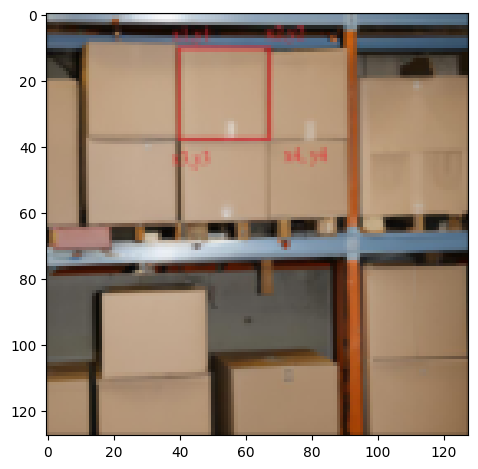

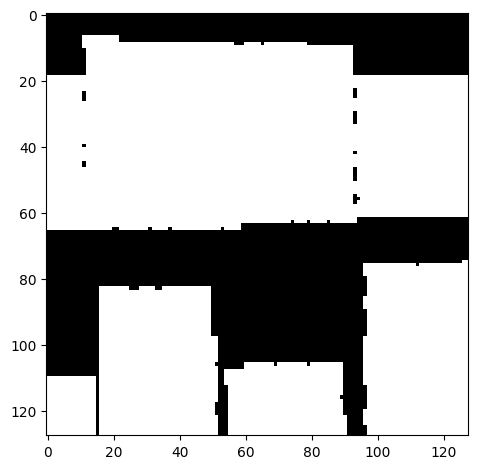

In [ ]:
import random
import matplotlib.pyplot as plt

# The seed value is a starting point for the sequence of random numbers generated by the random number generator.
# Setting a specific seed ensures that the sequence of random numbers generated is reproducible, meaning that the same sequence of random numbers will be generated each time the code is run with the same seed.
seed = 42
np.random.seed = seed

image_x = random.randint(0, len(x_train_ids)) # Generates a random integer between 0 and the length of the train_ids list.
imshow(X_train[image_x])
plt.show()
imshow(np.squeeze(Y_train[image_x]))
plt.show()

In [ ]:
# Build the model.

inputs = tf.keras.layers.Input((IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x : x/255)(inputs)

c1 = tf.keras.layers.Conv2D(16, kernel_size = (3,3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, kernel_size = (3,3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(c1)

p1 = tf.keras.layers.MaxPooling2D((2,2))(c1)
c2 = tf.keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(c2)

p2 = tf.keras.layers.MaxPooling2D((2,2))(c2)
c3 = tf.keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(c3)

p3 = tf.keras.layers.MaxPooling2D((2,2))(c3)
c4 = tf.keras.layers.Conv2D(128, kernel_size = (3,3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, kernel_size = (3,3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(c4)

p4 = tf.keras.layers.MaxPooling2D((2,2))(c4)
c5 = tf.keras.layers.Conv2D(256, kernel_size = (3,3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, kernel_size = (3,3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(c5)

# Expansive Path

u6 = tf.keras.layers.Conv2DTranspose(128, (2,2), strides = (2,2), padding = "same")(c5)
u6 = tf.keras.layers.Concatenate()([u6,c4])
c6 = tf.keras.layers.Conv2D(128, kernel_size = (3,3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, kernel_size = (3,3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(c6)

u7 = tf.keras.layers.Conv2DTranspose(64, (2,2), strides = (2,2), padding = "same")(c6)
u7 = tf.keras.layers.Concatenate()([u7,c3])
c7 = tf.keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(c7)

u8 = tf.keras.layers.Conv2DTranspose(32, (2,2), strides = (2,2), padding = "same")(c7)
u8 = tf.keras.layers.Concatenate()([u8,c2])
c8 = tf.keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(c8)

u9 = tf.keras.layers.Conv2DTranspose(16, (2,2), strides = (2,2), padding = "same")(c8)
u9 = tf.keras.layers.Concatenate()([u9,c1])
c9 = tf.keras.layers.Conv2D(16, kernel_size = (3,3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, kernel_size = (3,3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(c9)

outputs = tf.keras.layers.Conv2D(1, (1,1), activation = 'sigmoid')(c9)

model = tf.keras.Model(inputs = [inputs], outputs = [outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 lambda (Lambda)             (None, 128, 128, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 16)         448       ['lambda[0][0]']              
                                                                                                  
 dropout (Dropout)           (None, 128, 128, 16)         0         ['conv2d[0][0]']              
                                                                                              

In [ ]:
# Callbacks

checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_nuclei.keras', verbose=1, save_best_only=True)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=1)
log_csv = tf.keras.callbacks.CSVLogger('my_logs.csv', separator=',', append=False)
tensor_board = tf.keras.callbacks.TensorBoard(log_dir='logs', histogram_freq=1)

callbacks = [checkpointer, early_stopping, log_csv, tensor_board]

# Training the Model

results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=25, callbacks = callbacks)
# It may stop training before 25 epochs due to early stopping callback

Epoch 1/25
4/4 [==============================] - ETA: 0s - loss: 0.7978 - accuracy: 0.4801
Epoch 1: val_loss improved from inf to 0.66249, saving model to model_for_nuclei.keras
4/4 [==============================] - 21s 2s/step - loss: 0.7978 - accuracy: 0.4801 - val_loss: 0.6625 - val_accuracy: 0.5875
Epoch 2/25
3/4 [=====================>........] - ETA: 0s - loss: 0.6605 - accuracy: 0.5999
Epoch 2: val_loss did not improve from 0.66249
4/4 [==============================] - 1s 250ms/step - loss: 0.6635 - accuracy: 0.5957 - val_loss: 0.6669 - val_accuracy: 0.5810
Epoch 3/25
3/4 [=====================>........] - ETA: 0s - loss: 0.6461 - accuracy: 0.6099
Epoch 3: val_loss improved from 0.66249 to 0.65813, saving model to model_for_nuclei.keras
4/4 [==============================] - 1s 325ms/step - loss: 0.6567 - accuracy: 0.5982 - val_loss: 0.6581 - val_accuracy: 0.5817
Epoch 4/25
3/4 [=====================>........] - ETA: 0s - loss: 0.6617 - accuracy: 0.5979
Epoch 4: val_loss impr

In [ ]:
idx = random.randint(0, len(X_train))


preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_test = model.predict(X_test, verbose=1)


preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)

2/2 [==============================] - 1s 912ms/step


Perform a sanity check on some random training samples


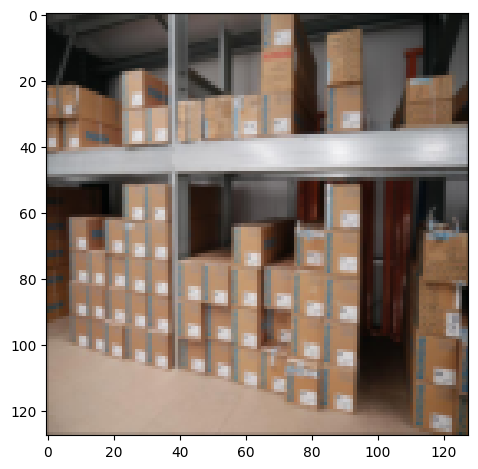

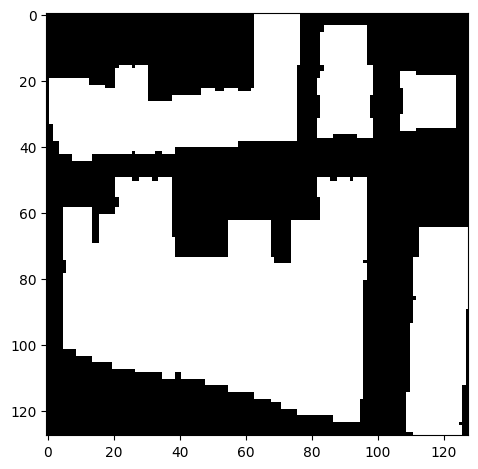

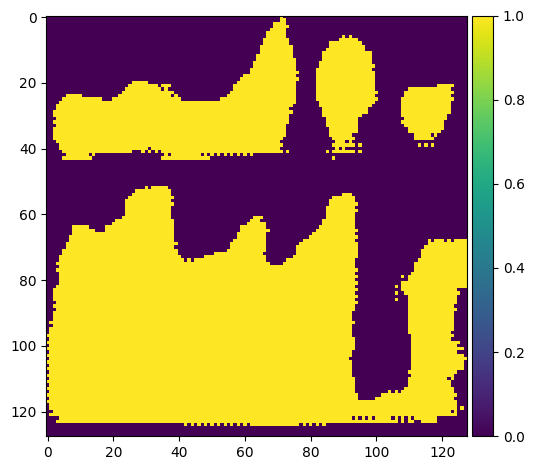

Perform a sanity check on some random validation samples


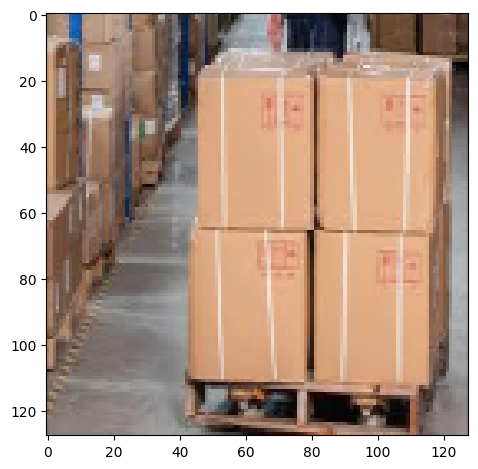

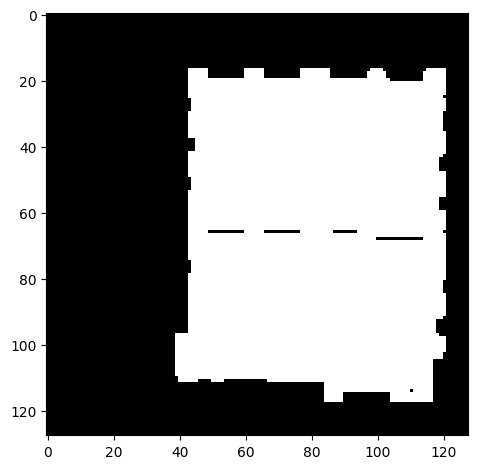

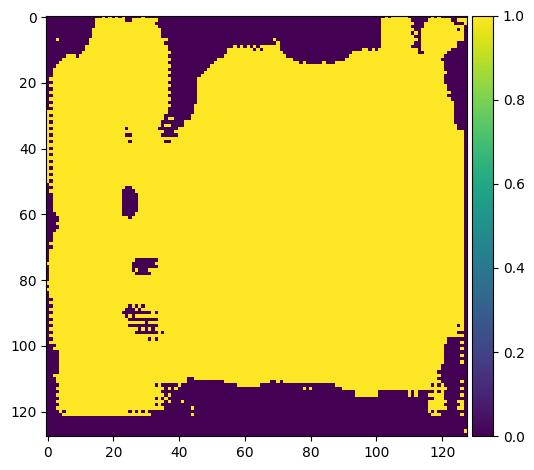

Perform a sanity check on some random testing samples


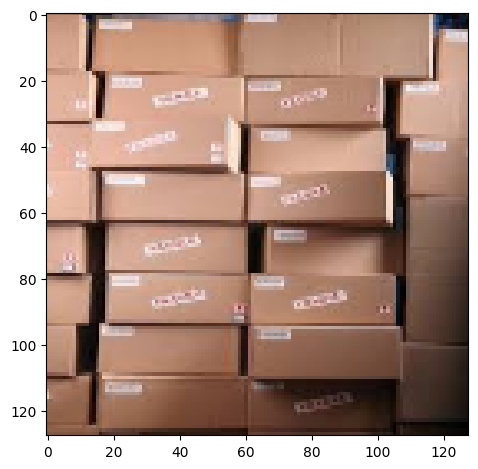

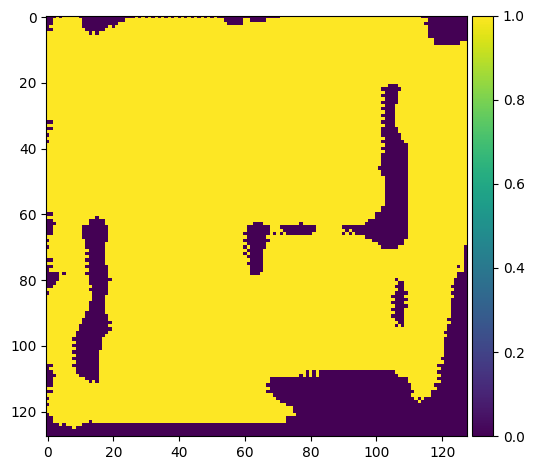

In [ ]:
# Perform a sanity check on some random training samples

print("Perform a sanity check on some random training samples")

ix = random.randint(0, len(preds_train_t))

imshow(X_train[ix])
plt.show()
imshow(np.squeeze(Y_train[ix]))
plt.show()
imshow(np.squeeze(preds_train_t[ix]))
plt.show()


# Perform a sanity check on some random validation samples

print("Perform a sanity check on some random validation samples")

ix = random.randint(0, len(preds_val_t))

imshow(X_train[int(X_train.shape[0]*0.9):][ix])
plt.show()
imshow(np.squeeze(Y_train[int(Y_train.shape[0]*0.9):][ix]))
plt.show()
imshow(np.squeeze(preds_val_t[ix]))
plt.show()


# Perform a sanity check on some random testing samples

print("Perform a sanity check on some random testing samples")

ix = random.randint(0, len(preds_test_t))

imshow(X_test[ix])
plt.show()
imshow(np.squeeze(preds_test_t[ix]))
plt.show()